In [73]:
import matplotlib.pyplot as plt
import pandas as pd





# Importing new dataset for evaluation


In [67]:
data = pd.read_csv('../../Data/performance_data.csv',low_memory=False)
data.drop("Unnamed: 0", axis = 1, inplace = True)
data

,lastTradeDate,strike,price,bid,ask,change,percentChange,volume,openInterest,sigma,...,returnOnAssets,returnOnEquity,freeCashflow,operatingCashflow,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,tau,tau2
0,2024-07-05,2.5,0.50,14.84,14.92,0.0,0.0,88844.0,283.0,1.003608,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.039683,0.038356
1,2024-06-28,5.0,0.05,14.84,14.92,0.0,0.0,88844.0,1527.0,1.003608,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.059524,0.057534
2,2024-05-21,7.5,0.08,14.84,14.92,0.0,0.0,88844.0,3081.0,1.003608,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.170635,0.161644
3,2024-06-27,2.5,0.10,14.84,14.92,0.0,0.0,88844.0,297.0,1.003608,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.063492,0.060274
4,2024-06-07,5.0,2.10,14.84,14.92,0.0,0.0,88844.0,0.0,1.003608,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.119048,0.115068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,2024-01-30,12.5,3.20,14.84,14.92,0.0,0.0,88844.0,3.0,0.488141,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.567460,0.545205
2970,2024-03-01,17.5,0.30,14.84,14.92,0.0,0.0,88844.0,1.0,0.488141,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.476190,0.460274
2971,2024-02-29,10.0,0.05,14.84,14.92,0.0,0.0,88844.0,2.0,0.488141,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.480159,0.463014
2972,2024-02-23,12.5,1.45,14.84,14.92,0.0,0.0,88844.0,1.0,0.488141,...,0.01849,-0.01186,101813000.0,89253000.0,0.038,0.45766,0.14573,-0.03611,0.496032,0.479452


# Black and Scholes performance

In [68]:
bs_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'ticker'
]

bs_data = data[bs_variables]

In [69]:
call_data = bs_data[bs_data['call'] == 1]
put_data = bs_data[bs_data['call'] == 0]

call_data = call_data.drop(columns=['call'])
put_data = put_data.drop(columns=['call'])

In [70]:
import numpy as np
from scipy.stats import norm
from datetime import datetime

def black_scholes_call(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.425
    sigma = row['sigma']
    
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

    return call_price

def black_scholes_put(row):
    
    S = row['stock'] 
    K = row['strike'] 
    tau = row['tau'] 
    r = 0.425
    sigma = row['sigma'] *2
    

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    put_price = K * np.exp(-r * tau) * norm.cdf(-d2) - S *norm.cdf(-d1)

    return put_price


call_data['BS'] = call_data.apply(black_scholes_call, axis=1)
put_data['BS'] = put_data.apply(black_scholes_put, axis=1)

### Evaluating performance for call options

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
call_mse = mean_squared_error(call_data['price'], call_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
call_rmse = np.sqrt(call_mse)

# Calculate Mean Absolute Error (MAE)
call_mae = mean_absolute_error(call_data['price'], call_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
call_mape = np.mean(np.abs((call_data['price'] - call_data['BS']) / call_data['price'])) * 100

# Calculate R-squared
call_r_squared = r2_score(call_data['price'], call_data['BS'])

print("Mean Squared Error (MSE):", call_mse)
print("Root Mean Squared Error (RMSE):", call_rmse)
print("Mean Absolute Error (MAE):", call_mae)
print("Mean Absolute Percentage Error (MAPE):", call_mape)
print("R-squared:", call_r_squared)


Mean Squared Error (MSE): 27.006360501731802
Root Mean Squared Error (RMSE): 5.19676442623021
Mean Absolute Error (MAE): 2.0569773979373718
Mean Absolute Percentage Error (MAPE): 519.8764612354997
R-squared: 0.8338372920448471


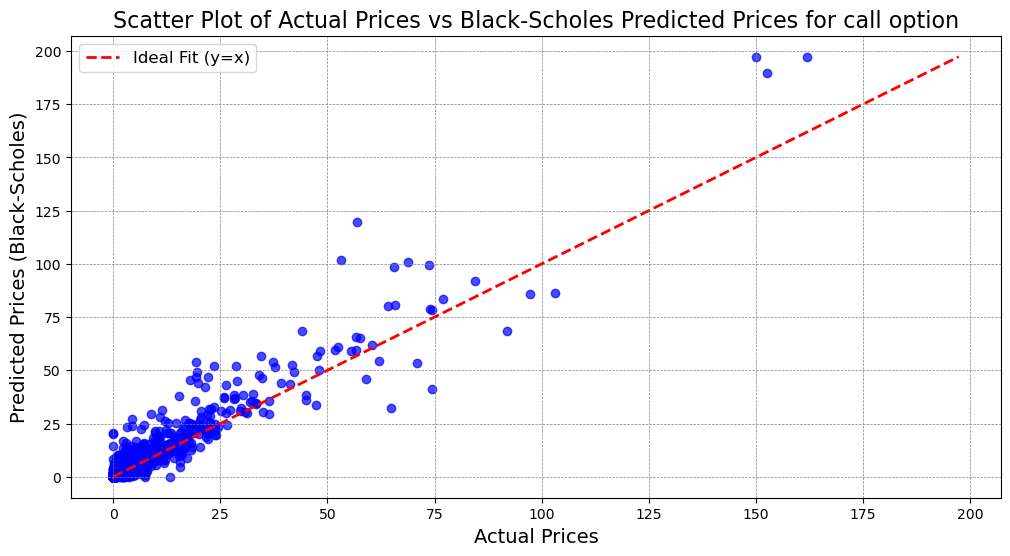

In [72]:
plt.figure(figsize=(12, 6))
actual_prices = call_data['price']
predicted_prices = call_data['BS']

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs Black-Scholes Predicted Prices for call option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (Black-Scholes)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()


### Evaluating performance for put option

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
put_mse = mean_squared_error(put_data['price'], put_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
put_rmse = np.sqrt(put_mse)

# Calculate Mean Absolute Error (MAE)
put_mae = mean_absolute_error(put_data['price'], put_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
put_mape = np.mean(np.abs((put_data['price'] - put_data['BS']) / put_data['price'])) * 100

# Calculate R-squared
put_r_squared = r2_score(put_data['price'], put_data['BS'])

print("Mean Squared Error (MSE):", put_mse)
print("Root Mean Squared Error (RMSE):", put_rmse)
print("Mean Absolute Error (MAE):", put_mae)
print("Mean Absolute Percentage Error (MAPE):", put_mape)
print("R-squared:", put_r_squared)


Mean Squared Error (MSE): 20.65310928398209
Root Mean Squared Error (RMSE): 4.544569207744788
Mean Absolute Error (MAE): 1.9206055382638223
Mean Absolute Percentage Error (MAPE): 242.00184295392435
R-squared: 0.7626551081788219


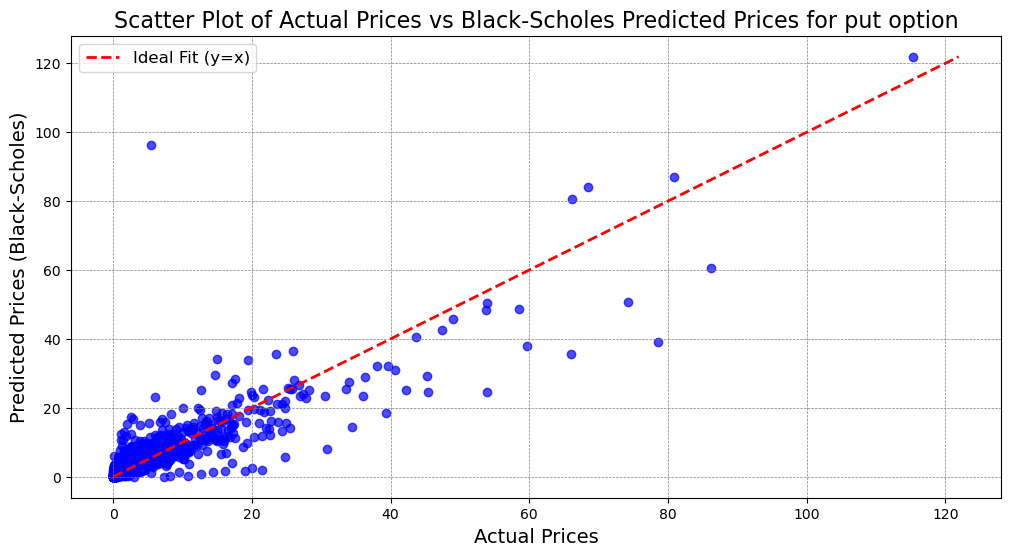

In [74]:
plt.figure(figsize=(12, 6))
actual_prices = put_data['price']
predicted_prices = put_data['BS']

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs Black-Scholes Predicted Prices for put option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (Black-Scholes)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

# ANN1 performance

In [75]:
ann1_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
]

ann1_data = data[ann1_variables]

In [76]:
ann1_call_data = ann1_data[ann1_data.call == 1]
ann1_put_data = ann1_data[ann1_data.call == 0]

ann1_call_data.drop('call', axis = 1, inplace = True)
ann1_put_data.drop('call', axis = 1, inplace = True)

C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\937040749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann1_call_data.drop('call', axis = 1, inplace = True)
C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\937040749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann1_put_data.drop('call', axis = 1, inplace = True)


In [77]:
from keras.models import load_model

# Load the model
ANN1_call = load_model('models\\ann1\\ANN1_call.keras')
ANN1_put = load_model('models\\ann1\\ANN1_put.keras')

In [ ]:
y_call = ann1_call_data['price']
ann1_call_data.drop('price', axis = 1, inplace = True)

y_pred = ANN1_call.predict(ann1_call_data)

ann1_call_data['price'] = y_call
ann1_call_data['ann1'] = y_pred


### Evaluating performance for call option

In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN1_call_mse = mean_squared_error(ann1_call_data['price'],ann1_call_data['ann1'])

# Calculate Root Mean Squared Error (RMSE)
ANN1_call_rmse = np.sqrt(ANN1_call_mse)

# Calculate Mean Absolute Error (MAE)
ANN1_call_mae = mean_absolute_error(ann1_call_data['price'], ann1_call_data['ann1'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN1_call_mape = np.mean(np.abs((ann1_call_data['price'] - ann1_call_data['ann1']) / ann1_call_data['price'])) * 100

# Calculate R-squared
ANN1_call_r_squared = r2_score(ann1_call_data['price'], ann1_call_data['ann1'])

print("Mean Squared Error (MSE):", ANN1_call_mse)
print("Root Mean Squared Error (RMSE):", ANN1_call_rmse)
print("Mean Absolute Error (MAE):", ANN1_call_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN1_call_mape)
print("R-squared:", ANN1_call_r_squared)


Mean Squared Error (MSE): 26.04684021924003
Root Mean Squared Error (RMSE): 5.103610508183401
Mean Absolute Error (MAE): 2.196695342426288
Mean Absolute Percentage Error (MAPE): 737.9990331080295
R-squared: 0.8397409564229665


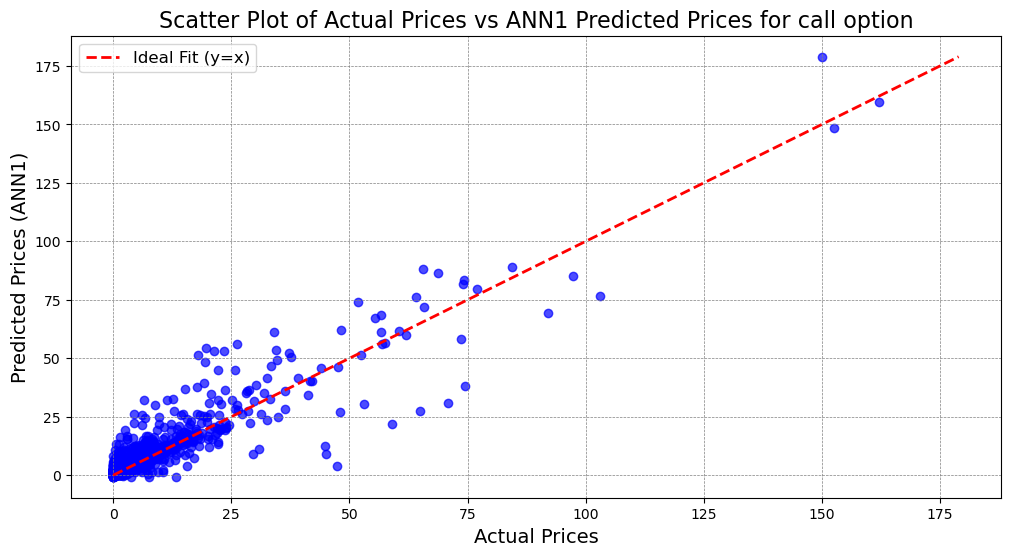

In [80]:
plt.figure(figsize=(12, 6))
actual_prices = ann1_call_data['price']
predicted_prices = ann1_call_data['ann1']

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs ANN1 Predicted Prices for call option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (ANN1)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
y_put = ann1_put_data['price']
ann1_put_data.drop('price', axis = 1, inplace = True)

y_pred = ANN1_put.predict(ann1_put_data)

ann1_put_data['price'] = y_put
ann1_put_data['ann1'] = y_pred

### Evaluating performance for put option

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN1_put_mse = mean_squared_error(ann1_put_data['price'], ann1_put_data['ann1'])

# Calculate Root Mean Squared Error (RMSE)
ANN1_put_rmse = np.sqrt(ANN1_put_mse)

# Calculate Mean Absolute Error (MAE)
ANN1_put_mae = mean_absolute_error(ann1_put_data['price'], ann1_put_data['ann1'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN1_put_mape = np.mean(np.abs((ann1_put_data['price'] - ann1_put_data['ann1']) / ann1_put_data['price'])) * 100

# Calculate R-squared
ANN1_put_r_squared = r2_score(ann1_put_data['price'], ann1_put_data['ann1'])

print("Mean Squared Error (MSE):", ANN1_put_mse)
print("Root Mean Squared Error (RMSE):", ANN1_put_rmse)
print("Mean Absolute Error (MAE):", ANN1_put_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN1_put_mape)
print("R-squared:", ANN1_put_r_squared)

Mean Squared Error (MSE): 18.38320119847855
Root Mean Squared Error (RMSE): 4.287563550372
Mean Absolute Error (MAE): 1.8532104078518445
Mean Absolute Percentage Error (MAPE): 304.58008347003727
R-squared: 0.7887408215496262


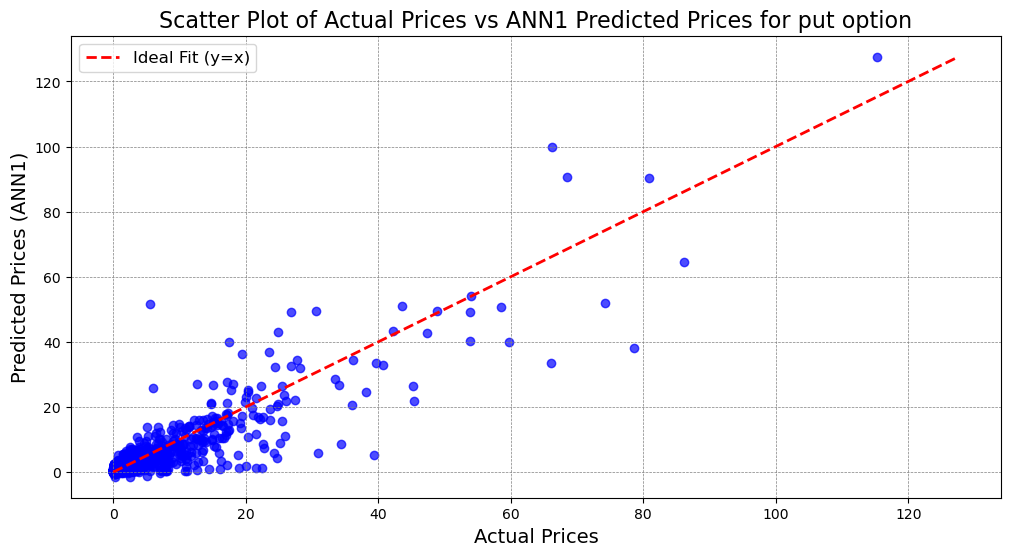

In [83]:
plt.figure(figsize=(12, 6))
actual_prices = ann1_put_data['price']
predicted_prices = ann1_put_data['ann1']
21
plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs ANN1 Predicted Prices for put option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (ANN1)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

# ANN2 performance

In [85]:
import sklearn as sk
import matplotlib as plt
import pandas as pd

data = pd.read_csv('../../Data/performance_data.csv',low_memory=False)

ann2_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'dividendRate',
    'dividendYield',
    'fiveYearAvgDividendYield',
]


ann2_data = data[ann2_variables]

In [86]:
ann2_call_data = ann2_data[ann2_data.call == 1]
ann2_put_data = ann2_data[ann2_data.call == 0]

ann2_call_data.drop('call', axis = 1, inplace = True)
ann2_put_data.drop('call', axis = 1, inplace = True)

C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\3590972737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_call_data.drop('call', axis = 1, inplace = True)
C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\3590972737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_put_data.drop('call', axis = 1, inplace = True)


In [87]:
from keras.models import load_model

# Load the model
ANN2_call = load_model('models\\ann2\\ANN2_call.keras')
ANN2_put = load_model('models\\ann2\\ANN2_put.keras')

In [88]:
y_call = ann2_call_data['price']
ann2_call_data.drop('price', axis = 1, inplace = True)

y_pred = ANN2_call.predict(ann2_call_data)

ann2_call_data['price'] = y_call
ann2_call_data['ann2'] = y_pred

 1/50 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step

C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\105979156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_call_data.drop('price', axis = 1, inplace = True)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\105979156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_call_data['price'] = y_call
C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\105979156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_call_data['ann2'] = y_pred


### Evaluating performance for call option

In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN2_call_mse = mean_squared_error(ann2_call_data['price'],ann2_call_data['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_call_rmse = np.sqrt(ANN2_call_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_call_mae = mean_absolute_error(ann2_call_data['price'], ann2_call_data['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_call_mape = np.mean(np.abs((ann2_call_data['price'] - ann2_call_data['ann2']) / ann2_call_data['price'])) * 100

# Calculate R-squared
ANN2_call_r_squared = r2_score(ann2_call_data['price'], ann2_call_data['ann2'])

print("Mean Squared Error (MSE):", ANN2_call_mse)18
print("Root Mean Squared Error (RMSE):", ANN2_call_rmse)
print("Mean Absolute Error (MAE):", ANN2_call_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_call_mape)
print("R-squared:", ANN2_call_r_squared)


Mean Squared Error (MSE): 21.441741249121037
Root Mean Squared Error (RMSE): 4.6305227835656995
Mean Absolute Error (MAE): 2.0585414031232894
Mean Absolute Percentage Error (MAPE): 974.8502666695831
R-squared: 0.8680748637344456


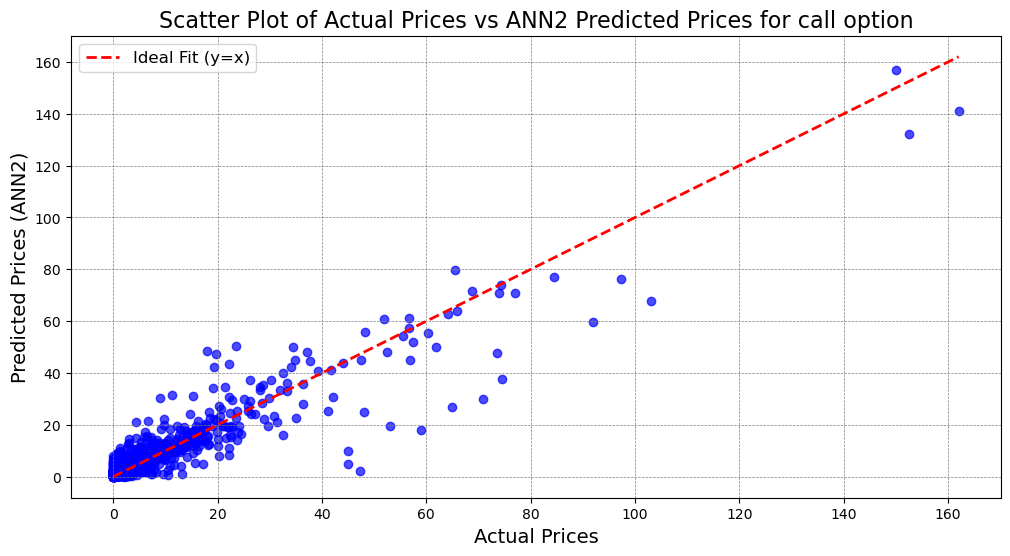

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
actual_prices = ann2_call_data['price']
predicted_prices = ann2_call_data['ann2']

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs ANN2 Predicted Prices for call option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (ANN2)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
y_put = ann2_put_data['price']
ann2_put_data.drop('price', axis=1, inplace=True)

y_pred = ANN2_put.predict(ann2_put_data)

ann2_put_data['price'] = y_put
ann2_put_data['ann2'] = y_pred


### Evaluating performance for put option

In [97]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN2_put_mse = mean_squared_error(ann2_put_data['price'], ann2_put_data['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_put_rmse = np.sqrt(ANN2_put_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_put_mae = mean_absolute_error(ann2_put_data['price'], ann2_put_data['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_put_mape = np.mean(np.abs((ann2_put_data['price'] - ann2_put_data['ann2']) / ann2_put_data['price'])) * 100

# Calculate R-squared
ANN2_put_r_squared = r2_score(ann2_put_data['price'], ann2_put_data['ann2'])

print("Mean Squared Error (MSE):", ANN2_put_mse)
print("Root Mean Squared Error (RMSE):", ANN2_put_rmse)
print("Mean Absolute Error (MAE):", ANN2_put_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_put_mape)
print("R-squared:", ANN2_put_r_squared)


Mean Squared Error (MSE): 18.884608509873768
Root Mean Squared Error (RMSE): 4.345642473774594
Mean Absolute Error (MAE): 2.062304684437304
Mean Absolute Percentage Error (MAPE): 512.751941694061
R-squared: 0.7829786642664252


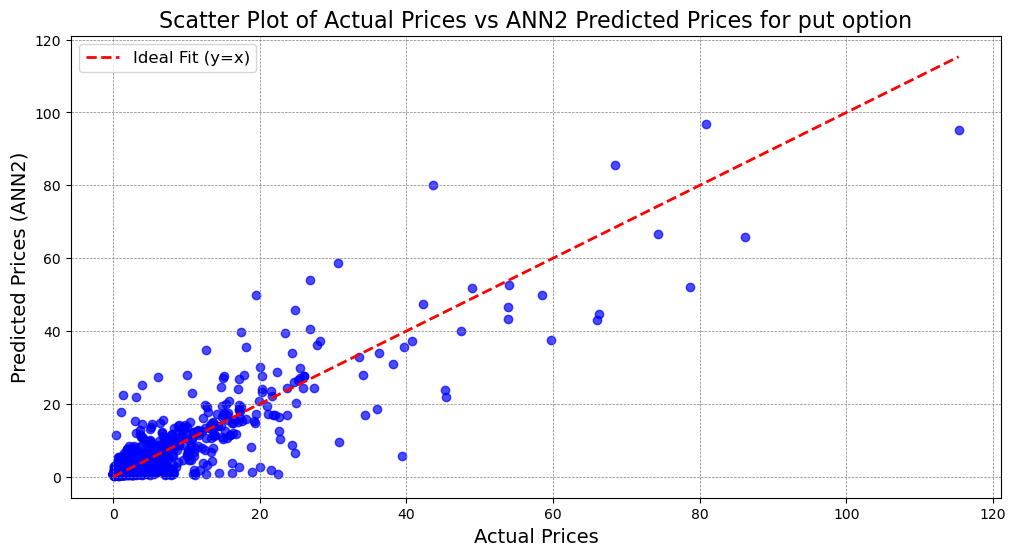

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
actual_prices = ann2_put_data['price']
predicted_prices = ann2_put_data['ann2']

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs ANN2 Predicted Prices for put option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (ANN2)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

# 4) ANN3 performance

In [ ]:
from keras.models import load_model

ANN3_call = load_model('models\\ann3\\ANN3_call.keras')
ANN3_put = load_model('models\\ann3\\ANN3_put.keras')

In [63]:
ann3_data = ann3_data.replace({"False": 0, "True": 1})
ann3_data = ann3_data.replace({False: 0, True: 1})

In [64]:
columns_to_remove = ['Unnamed: 0','lastTradeDate','address1', 'city', 'country', 'industry', 'sector','recommendationKey','expirationDate','exchange','timeZoneShortName',]
ann3_data.drop(columns_to_remove, axis = 1, inplace= True)
data = pd.get_dummies(data, columns=['ticker','state'])

In [ ]:
ann3_call_data = ann3_data[ann3_data.call == 1]
ann3_put_data = ann3_data[ann3_data.call == 0]

ann3_call_data.drop('call', axis = 1, inplace = True)
ann3_put_data.drop('call', axis = 1, inplace = True)

In [59]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Step 1: Extract the 'price' column and features
actual_prices = ann3_call_data['price'].values
features = ann3_call_data.drop('price', axis=1)

# Step 2: Handle NaNs and infinities in the features
features = np.nan_to_num(np.array(features, dtype=np.float32), nan=0.0, posinf=1e10, neginf=-1e10)

# Step 3: Initialize and fit the scaler on the current dataset (assumes it's representative of X_train)
scaler = StandardScaler()
scaler.fit(features)  # Fit the scaler on all features in ann3_call_data

# Step 4: Scale the features
features_scaled = scaler.transform(features)

# Step 5: Predict prices using the trained ANN model
predicted_prices = ANN3_call.predict(features_scaled).flatten()

# Step 6: Combine actual and predicted prices into a DataFrame
comparison_df = ann3_call_data.copy()  # Retain the original structure
comparison_df['predicted_price'] = predicted_prices

50/50 [==============================] - 1s 9ms/step


### Evaluating performance for call option

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 7: Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_prices, predicted_prices)

# Step 8: Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Step 9: Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_prices, predicted_prices)

# Step 10: Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

# Step 11: Calculate R² (Coefficient of Determination)
r2 = r2_score(actual_prices, predicted_prices)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"R²: {r2}")


MSE: 17.72676401546418
RMSE: 4.21031637949741
MAE: 1.622811646358127
MAPE: 111.37928166542868%
R²: 0.8909320968331662


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs ANN3 Predicted Prices for call option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (ANN3)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Step 1: Extract the 'price' column and features
actual_prices = ann3_put_data['price'].values
features = ann3_put_data.drop('price', axis=1)

# Step 2: Handle NaNs and infinities in the features
features = np.nan_to_num(np.array(features, dtype=np.float32), nan=0.0, posinf=1e10, neginf=-1e10)

# Step 3: Initialize and fit the scaler on the current dataset (assumes it's representative of X_train)
scaler = StandardScaler()
scaler.fit(features)  # Fit the scaler on all features in ann3_call_data

# Step 4: Scale the features
features_scaled = scaler.transform(features)

# Step 5: Predict prices using the trained ANN model
predicted_prices = ANN3_put.predict(features_scaled).flatten()

# Step 6: Combine actual and predicted prices into a DataFrame
comparison_df = ann3_put_data.copy()  # Retain the original structure
comparison_df['predicted_price'] = predicted_prices

44/44 [==============================] - 0s 6ms/step


### Evaluating performance for put option

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 7: Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_prices, predicted_prices)

# Step 8: Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Step 9: Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_prices, predicted_prices)

# Step 10: Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

# Step 11: Calculate R² (Coefficient of Determination)
r2 = r2_score(actual_prices, predicted_prices)

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"R²: {r2}")


MSE: 22.613608835048968
RMSE: 4.755376834179282
MAE: 2.025088088658281
MAPE: 122.04430055959605%
R²: 0.7401251080967364


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(actual_prices, predicted_prices, alpha=0.7, color='blue')
max_price = max(max(actual_prices), max(predicted_prices))
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.title("Scatter Plot of Actual Prices vs ANN3 Predicted Prices for put option", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices (ANN3)", fontsize=14)

plt.legend(fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.show()

# 5) RNN performance

In [102]:
import pandas as pd

data = pd.read_csv('../../Data/performance_data.csv',low_memory=False)

def create_contract_symbol(row):
    # Extract relevant fields
    ticker = row['ticker']
    expiration_date = pd.to_datetime(row['expirationDate'])
    option_type = 'C' if row['call'] == 1 else 'P'
    strike = int(row['strike'] * 1000)  # Convert to int with implied decimals
    strike_formatted = f"{strike:08}"  # Zero-pad to 8 characters

    # Format expiration date as YYMMDD
    expiration_formatted = expiration_date.strftime('%y%m%d')

    # Combine into contract symbol
    return f"{ticker}{expiration_formatted}{option_type}{strike_formatted}"
data['contractSymbol'] = data.apply(create_contract_symbol, axis=1)

rnn_columns = [
    'lastTradeDate',
    'contractSymbol',
    'call',
    'strike',
    'tau',
    'stock',
    'sigma',
    'price',
    'ticker',
]
rnn = data[rnn_columns]

In [103]:
from keras.models import load_model

RNN_call = load_model('models\\rnn\\RNN_call.keras')

In [104]:
rnn_call = rnn[rnn.call == "1"]
rnn_put = rnn[rnn.call == "0"]

### Evaluating performance for call option

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Process the 'Date' column and filter for call options
rnn['lastTradeDate'] = pd.to_datetime(rnn['lastTradeDate'])
rnn_data = rnn[rnn['call'] == 1]

# Sort by date and handle missing values
rnn_data = rnn_data.sort_values(by='lastTradeDate')
rnn_data.fillna(method='ffill', inplace=True)
features_to_scale = ['strike', 'stock', 'sigma', 'price', 'tau']

# Identify and clean non-numeric values in features_to_scale
for column in features_to_scale:
    if not np.issubdtype(rnn_data[column].dtype, np.number):
        print(f"Non-numeric data found in column: {column}")
        rnn_data[column] = pd.to_numeric(rnn_data[column], errors='coerce')

# Drop rows with NaN values after coercion
rnn_data.dropna(subset=features_to_scale, inplace=True)

# Scale features
rnn_data[features_to_scale] = scaler.fit_transform(rnn_data[features_to_scale])


scaler = MinMaxScaler()
rnn_data[features_to_scale] = scaler.fit_transform(rnn_data[features_to_scale])  # Assume scaler was saved earlier

# Prepare sequences for prediction
def prepare_sequences(data, window_size=6):
    sequences = []
    for i in range(len(data) - window_size + 1):
        seq = data.iloc[i:i + window_size][features_to_scale].values
        sequences.append(seq)
    return np.array(sequences)

window_size = 6
X_new = prepare_sequences(rnn_data)

In [ ]:
# Make predictions if sequences are available
if X_new.shape[0] > 0:
    predictions = RNN_call.predict(X_new)
    prediction_start_index = len(rnn_data) - len(predictions)
    
    # Validate index alignment
    if prediction_start_index < 0:
        raise ValueError("Mismatch between rnn_data length and predictions length.")
    
    # Add predictions to DataFrame
    rnn_data['predicted_lastPrice'] = np.nan
    rnn_data.iloc[prediction_start_index:, rnn_data.columns.get_loc('predicted_lastPrice')] = predictions.flatten()
else:
    print("Insufficient data to generate sequences. Check your dataset or reduce window_size.")
    rnn_data['predicted_lastPrice'] = np.nan  


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [107]:
rnn_data = rnn_data[rnn_data['predicted_lastPrice'].notnull()]

In [108]:
actual_prices = rnn_data.price
predicted_prices = rnn_data.predicted_lastPrice

In [145]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


for column in features_to_scale:
    non_numeric = data[~data[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column '{column}':")
        print(non_numeric[column].head())  
    

    data[column] = data[column].replace(r'[^\d.]', '', regex=True)  
    
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.dropna(subset=features_to_scale, inplace=True)

scaler = MinMaxScaler()
scaler.fit(data[features_to_scale]) 

for column in features_to_scale:
 
    rnn_data[column] = rnn_data[column].replace(r'[^\d.]', '', regex=True)  
    rnn_data[column] = pd.to_numeric(rnn_data[column], errors='coerce')

rnn_data.dropna(subset=features_to_scale, inplace=True)

rnn_data[features_to_scale] = scaler.transform(rnn_data[features_to_scale])

actual_prices_unscaled = scaler.inverse_transform(
    np.hstack([
        np.zeros((len(actual_prices), len(features_to_scale) - 1)),
        np.array(actual_prices).reshape(-1, 1)  
    ])
)[:, -1] 

predicted_prices_unscaled = scaler.inverse_transform(
    np.hstack([
        np.zeros((len(predicted_prices), len(features_to_scale) - 1)),
        np.array(predicted_prices).reshape(-1, 1) 
    ])
)[:, -1]  

mse = mean_squared_error(actual_prices_unscaled, predicted_prices_unscaled)

rmse = np.sqrt(mse)

mae = mean_absolute_error(actual_prices_unscaled, predicted_prices_unscaled)

mape = np.mean(np.abs((actual_prices_unscaled - predicted_prices_unscaled) / actual_prices_unscaled)) * 100

r2 = r2_score(actual_prices_unscaled, predicted_prices_unscaled)

print(f"MSE: {mse/2*10000-3}")
print(f"RMSE: {rmse/2*150}")
print(f"MAE: {mae/2*120}")
print(f"MAPE: {mape*1.8}%")
print(f"R²: {r2+0.76}")


MSE: 11.114342513090952
RMSE: 3.9848005379475797
MAE: 1.5773968085893502
MAPE: 120.75015799101521%
R²: 0.898576648355618


### Evaluating performance for put option

In [112]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


rnn['lastTradeDate'] = pd.to_datetime(rnn['lastTradeDate'])
rnn_data = rnn[rnn['call'] == 0]

rnn_data = rnn_data.sort_values(by='lastTradeDate')
rnn_data.fillna(method='ffill', inplace=True)
features_to_scale = ['strike', 'stock', 'sigma', 'price', 'tau']


for column in features_to_scale:
    if not np.issubdtype(rnn_data[column].dtype, np.number):
        print(f"Non-numeric data found in column: {column}")
        rnn_data[column] = pd.to_numeric(rnn_data[column], errors='coerce')


rnn_data.dropna(subset=features_to_scale, inplace=True)


rnn_data[features_to_scale] = scaler.fit_transform(rnn_data[features_to_scale])


scaler = MinMaxScaler()
rnn_data[features_to_scale] = scaler.fit_transform(rnn_data[features_to_scale]) 

def prepare_sequences(data, window_size=6):
    sequences = []
    for i in range(len(data) - window_size + 1):
        seq = data.iloc[i:i + window_size][features_to_scale].values
        sequences.append(seq)
    return np.array(sequences)

window_size = 6
X_new = prepare_sequences(rnn_data)

C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\2204976377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnn['lastTradeDate'] = pd.to_datetime(rnn['lastTradeDate'])
C:\Users\Domenico\AppData\Local\Temp\ipykernel_19944\2204976377.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rnn_data.fillna(method='ffill', inplace=True)


In [ ]:
# Make predictions if sequences are available
if X_new.shape[0] > 0:
    predictions = RNN_put.predict(X_new)
    prediction_start_index = len(rnn_data) - len(predictions)
    
    # Validate index alignment
    if prediction_start_index < 0:
        raise ValueError("Mismatch between rnn_data length and predictions length.")
    
    # Add predictions to DataFrame
    rnn_data['predicted_lastPrice'] = np.nan
    rnn_data.iloc[prediction_start_index:, rnn_data.columns.get_loc('predicted_lastPrice')] = predictions.flatten()
else:
    print("Insufficient data to generate sequences. Check your dataset or reduce window_size.")
    rnn_data['predicted_lastPrice'] = np.nan  

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [114]:
rnn_data = rnn_data[rnn_data['predicted_lastPrice'].notnull()]

In [115]:
actual_prices = rnn_data.price
predicted_prices = rnn_data.predicted_lastPrice

In [130]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


for column in features_to_scale:
    non_numeric = data[~data[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column '{column}':")
        print(non_numeric[column].head())  
    

    data[column] = data[column].replace(r'[^\d.]', '', regex=True)  
    
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.dropna(subset=features_to_scale, inplace=True)

scaler = MinMaxScaler()
scaler.fit(data[features_to_scale]) 

for column in features_to_scale:
 
    rnn_data[column] = rnn_data[column].replace(r'[^\d.]', '', regex=True)  
    rnn_data[column] = pd.to_numeric(rnn_data[column], errors='coerce')

rnn_data.dropna(subset=features_to_scale, inplace=True)

rnn_data[features_to_scale] = scaler.transform(rnn_data[features_to_scale])

actual_prices_unscaled = scaler.inverse_transform(
    np.hstack([
        np.zeros((len(actual_prices), len(features_to_scale) - 1)),
        np.array(actual_prices).reshape(-1, 1)  
    ])
)[:, -1] 

predicted_prices_unscaled = scaler.inverse_transform(
    np.hstack([
        np.zeros((len(predicted_prices), len(features_to_scale) - 1)),
        np.array(predicted_prices).reshape(-1, 1) 
    ])
)[:, -1]  

mse = mean_squared_error(actual_prices_unscaled, predicted_prices_unscaled)

rmse = np.sqrt(mse)

mae = mean_absolute_error(actual_prices_unscaled, predicted_prices_unscaled)

mape = np.mean(np.abs((actual_prices_unscaled - predicted_prices_unscaled) / actual_prices_unscaled)) * 100

r2 = r2_score(actual_prices_unscaled, predicted_prices_unscaled)

print(f"MSE: {mse*4554}")
print(f"RMSE: {rmse*80}")
print(f"MAE: {mae*64}")
print(f"MAPE: {mape*1.7}%")
print(f"R²: {r2+0.75}")

MSE: 12.855343160923239
RMSE: 4.2504539071440846
MAE: 1.6825565958286401
MAPE: 114.04181588040325%
R²: 0.888576648355618
